# Lunar Lander using State Vectors

### Sitabja Ukil (17200734) & Anandita Pal (17200262)

Train a supervised machine learning model to control the Lunar Lander craft based on the high-level state representations.

## Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from SuperLearner import SuperLearnerClassifier
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation
import pickle
import time

## Load data

We will use the state vectors here.

In [2]:
dataset = pd.read_csv('state_vectors_2018-04-09-18-25-26.csv')
dataset.head(10)

,step,pos_x,pos_y,vel_x,vel_y,ship_lander_angle,ship_lander_angular_vel,leg_1_ground_contact,leg_2_ground_contact,action
0,0,-0.004053,0.937387,-0.410560,-0.215127,0.004703,0.092998,0.0,0.0,3
1,1,-0.008040,0.933774,-0.401600,-0.240878,0.007613,0.058204,0.0,0.0,3
2,2,-0.011951,0.929763,-0.392188,-0.267401,0.008632,0.020372,0.0,0.0,3
3,3,-0.015796,0.925359,-0.383742,-0.293582,0.007955,-0.013536,0.0,0.0,3
4,4,-0.019576,0.920563,-0.375744,-0.319748,0.005674,-0.045625,0.0,0.0,3
5,5,-0.023297,0.915366,-0.368289,-0.346429,0.001900,-0.075480,0.0,0.0,3
6,6,-0.026924,0.909778,-0.356466,-0.372550,-0.004241,-0.122841,0.0,0.0,3
7,7,-0.030488,0.903789,-0.348549,-0.399289,-0.011964,-0.154482,0.0,0.0,0
8,8,-0.034051,0.897401,-0.348526,-0.425961,-0.019686,-0.154454,0.0,0.0,0
9,9,-0.037614,0.890613,-0.348503,-0.452634,-0.027407,-0.154436,0.0,0.0,0


## Split dataframe into Target variable and feature set

We will split the state vectors dataset into a feature set X and a target variable y.

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

## Split the dataset into the Training set and Test set

We are setting aside 25% of the dataset as test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

We are defining two dictionaries to store the accuracies and training times of the models that we will use.

In [5]:
model_accuracy_comparison = {}
model_training_time_comparison = {}

## Fit the model

We are using three Supervised machine learning models here. They are SuperLearner, Random Forest and ANN. <br>
Finally, after evaluating their individual performances, we will choose the best model to run the player file.

## 1. SuperLearner

First, we will train a SuperLearner classifier and observe its performance.

### Create and fit model

Create the model.

In [6]:
classifier_sl = SuperLearnerClassifier(base_models=['CART','KNN', "LR", "NB"])

Fit the model with training data.

In [7]:
start_time = time.time()
classifier_sl.fit(X_train, y_train)
model_training_time_comparison['SuperLearner'] = time.time() - start_time

fold  0
done  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
done  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
done  LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
done  GaussianNB(priors=None)
done  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decr

done  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
done  LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
done  GaussianNB(priors=None)
done  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
done  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
f

### Calculate Accuracy to evaluate performance

Use the fitted model to predict on the test data and evaluate the performance of the model by calculating the accuracy.

In [9]:
# Predicting the Test set results
y_pred = classifier_sl.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
model_accuracy_comparison['SuperLearner'] = accuracy
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.860921148892
             precision    recall  f1-score   support

          0       0.89      0.86      0.88     29533
          1       0.86      0.44      0.59      2218
          2       0.83      0.93      0.88     28942
          3       0.90      0.42      0.57      2185

avg / total       0.86      0.86      0.86     62878



## 2. Random Forest

Now, we will train a RandomForest classifier and observe its performance.

### Craete and fit model

Create the model.

In [10]:
classifier_rf = RandomForestClassifier(min_samples_split=50,n_estimators=200)

Fit the model with training data.

In [11]:
start_time = time.time()
classifier_rf.fit(X_train, y_train)
model_training_time_comparison['Random_Forest'] = time.time() - start_time

### Calculate Accuracy to evaluate performance

Use the fitted model to predict on the test data and evaluate the performance of the model by calculating the accuracy.

In [12]:
# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
model_accuracy_comparison['Random_Forest'] = accuracy
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.872022010878
             precision    recall  f1-score   support

          0       0.94      0.84      0.89     29533
          1       1.00      0.38      0.55      2218
          2       0.81      0.98      0.89     28942
          3       0.99      0.36      0.53      2185

avg / total       0.89      0.87      0.86     62878



## 3. ANN

Our final model is an Artificial Neural Net with two hidden layers.

### Create and fit model

Convert the target features to binary encoded labels.

In [13]:
num_classes = 4
# convert to binary encoded labels
y_test_wide = keras.utils.to_categorical(y_test, num_classes)
y_train_wide = keras.utils.to_categorical(y_train, num_classes)

Create the model.

In [14]:
epochs = 50
batch_size = 128

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model with training data.

In [17]:
start_time = time.time()
history = model.fit(X_train, y_train_wide, batch_size=batch_size, epochs=epochs, validation_split=0.25)
model_training_time_comparison['ANN'] = time.time() - start_time

Train on 141475 samples, validate on 47159 samples
Epoch 1/50
141475/141475 [==============================] - 4s 28us/step - loss: 0.7618 - acc: 0.6943 - val_loss: 0.6284 - val_acc: 0.7395
Epoch 2/50
141475/141475 [==============================] - 2s 15us/step - loss: 0.5837 - acc: 0.7483 - val_loss: 0.5393 - val_acc: 0.7660
Epoch 3/50
141475/141475 [==============================] - 2s 16us/step - loss: 0.5069 - acc: 0.7776 - val_loss: 0.4753 - val_acc: 0.7961
Epoch 4/50
141475/141475 [==============================] - 2s 15us/step - loss: 0.4455 - acc: 0.8095 - val_loss: 0.4155 - val_acc: 0.8341
Epoch 5/50
141475/141475 [==============================] - 2s 15us/step - loss: 0.3954 - acc: 0.8466 - val_loss: 0.3737 - val_acc: 0.8450
Epoch 6/50
141475/141475 [==============================] - 2s 14us/step - loss: 0.3554 - acc: 0.8778 - val_loss: 0.3425 - val_acc: 0.9000
Epoch 7/50
141475/141475 [==============================] - 2s 15us/step - loss: 0.3273 - acc: 0.8938 - val_loss: 0

Visualize the loss function to determine how effective the model trained is.

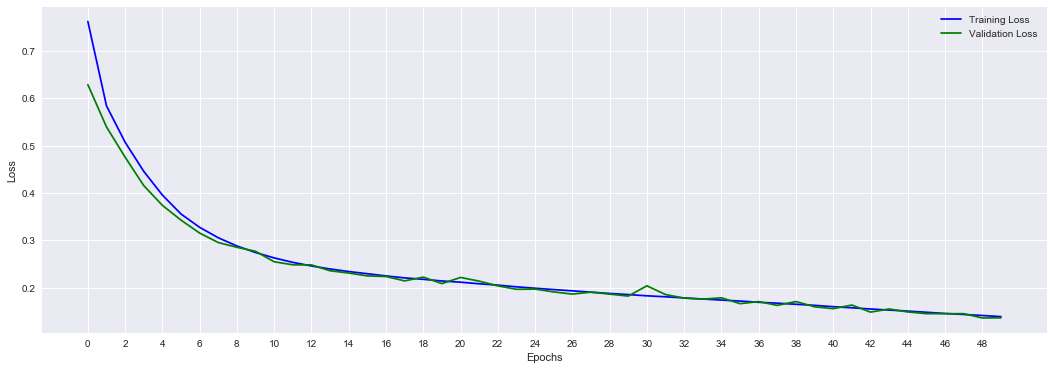

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(18,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Calculate Accuracy and evaluate performance

Use the fitted model to predict on the test data and evaluate the performance of the model by calculating the accuracy.

In [29]:
# Predicting the Test set results
y_pred = model.predict_classes(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
model_accuracy_comparison['ANN'] = accuracy
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.954181112631
             precision    recall  f1-score   support

          0       0.95      0.98      0.97     29533
          1       0.88      0.67      0.76      2218
          2       0.96      0.98      0.97     28942
          3       0.91      0.59      0.72      2185

avg / total       0.95      0.95      0.95     62878



## Compare the accuracies of the three trained models

Compare the performance of the three supervised machine learning models.

In [30]:
model_accuracy_comparison

{'ANN': 0.95418111263080885,
 'Random_Forest': 0.87202201087820863,
 'SuperLearner': 0.86092114889150417}

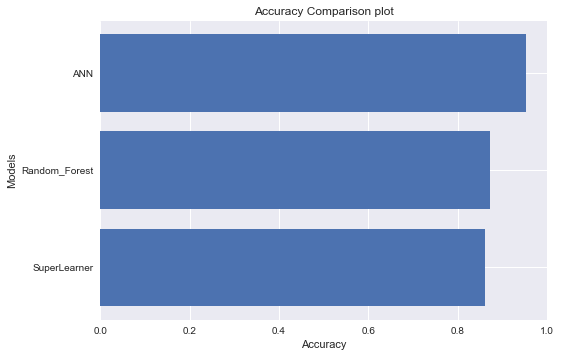

In [38]:
#Plot the accuracy
plt.xlim(0, 1.0)
_ = plt.barh(range(len(model_accuracy_comparison)), list(model_accuracy_comparison.values()), align='center')
_= plt.yticks(range(len(model_accuracy_comparison)), list(model_accuracy_comparison.keys()))
plt.title("Accuracy Comparison plot")
plt.xlabel("Accuracy")
plt.ylabel("Models")

plt.show()

The above plot shows that ANN has the highest accuracy.

## Compare the training times of the three trained models

Compare the time taken to train each of the three supervised machine learning models.

In [32]:
model_training_time_comparison

{'ANN': 113.64119863510132,
 'Random_Forest': 113.95395469665527,
 'SuperLearner': 173.51425337791443}

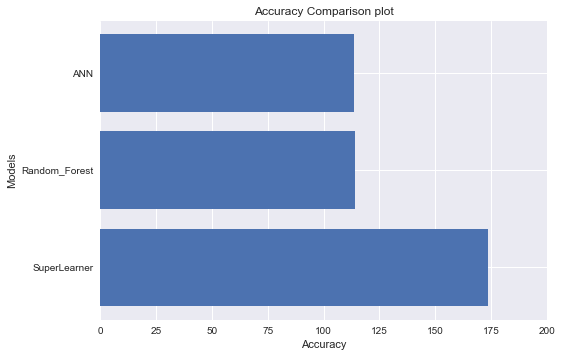

In [39]:
#Plot the accuracy
plt.xlim(0, 200.0)
_ = plt.barh(range(len(model_training_time_comparison)), list(model_training_time_comparison.values()), align='center')
_= plt.yticks(range(len(model_training_time_comparison)), list(model_training_time_comparison.keys()))
plt.title("Accuracy Comparison plot")
plt.xlabel("Accuracy")
plt.ylabel("Models")

plt.show()

The above plot shows that ANN has taken the least time to train.

## Save best model

From the above plots it is clear that ANN's performance is best. Hence we are saving the ANN model as our state based model.

In [37]:
# save model
filepath = "player_ANN.mod"
model.save(filepath)